In [1]:
# 1. import libraries
#
# 2. define data directory and create train and test datasets
#
# 3. define model
#
# 4. complile, preprocess data, and fit model
#
# 5. plot results

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from PIL import Image
import cv2
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.constraints import max_norm
from keras.regularizers import l1,l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from keras.applications import VGG16
from keras.applications import VGG19

Using TensorFlow backend.


In [59]:
# define project dataset directory

dataset =  './dataset/severity/'

In [60]:
# define classes folders
        
classes = [i for i in os.listdir(dataset) if i[0] != '.']        
print(classes)

['moderate', 'severe', 'minor']


In [15]:
# create training and validation folders
# https://github.com/jfilter/split-folders
# !pip install split-folders

# import split_folders
# input_folder = dataset
# output = './severity_dataset/'
# split_folders.ratio(input_folder, output = output, seed = 99, ratio = (.8, .2))

In [61]:
# update project dataset directory
severity_dataset = './severity_dataset/'

In [62]:
# define modelling folders

folders = [i for i in os.listdir(severity_dataset) if i[0] != '.']        
print(folders)

['train', 'val']


In [63]:
# summarise project dataset
dataset_summary = {}
for folder in folders:
    dataset_summary[folder] = {}
    for cl in classes:
        images = os.listdir(severity_dataset + folder + '/' + cl)
        dataset_summary[folder][cl] = len(images)
        
print(dataset_summary)        

{'train': {'moderate': 240, 'severe': 240, 'minor': 240}, 'val': {'moderate': 60, 'severe': 60, 'minor': 60}}


Category: moderate
--------------------------
Shape of original image (168, 300, 3)


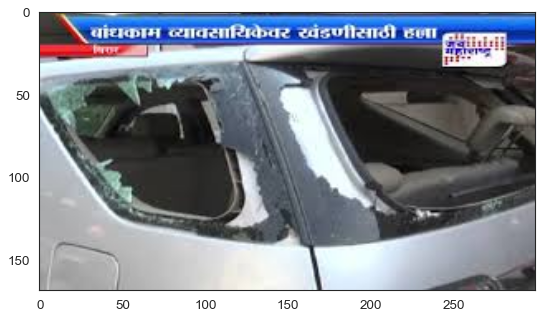

Shape of resized image (128, 128, 3)


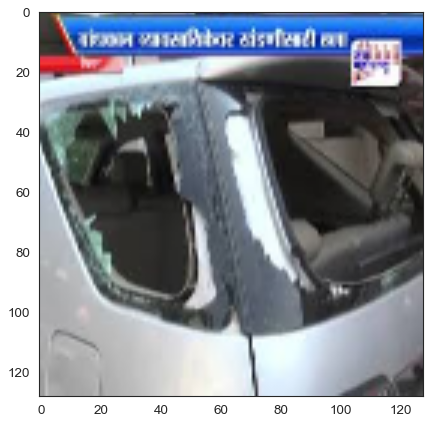

Category: severe
--------------------------
Shape of original image (163, 310, 3)


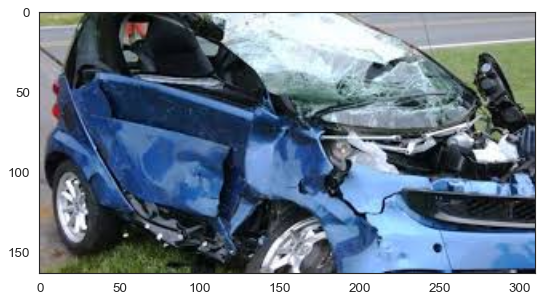

Shape of resized image (128, 128, 3)


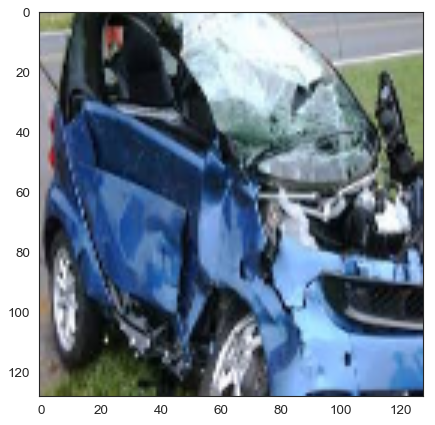

Category: minor
--------------------------
Shape of original image (217, 233, 3)


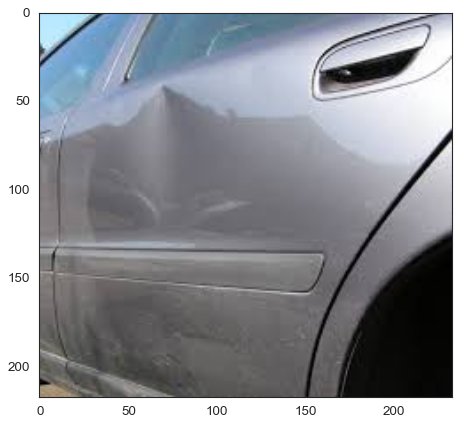

Shape of resized image (128, 128, 3)


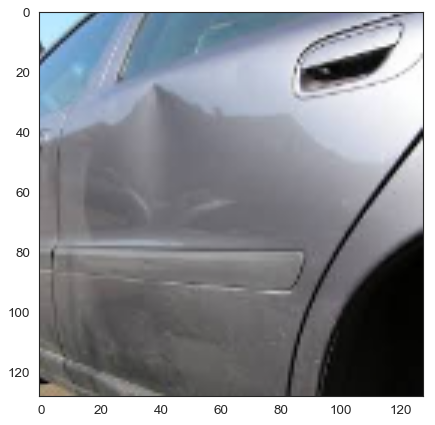

In [88]:
for cl in classes:
    cl_ = cl[:3]
    path = severity_dataset + 'train/' + cl + '/' + cl_ + '_0001.JPEG'
    original_image = cv2.imread(path)
    resized_image = cv2.resize(original_image, (128,128))
    print('Category:', cl)
    print('--------------------------')
    print('Shape of original image',original_image.shape)
    sns.set_style('white')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.show()
    print('Shape of resized image',resized_image.shape)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

In [54]:
# define categorical model inputs

train_dataset = dataset + 'train'
val_dataset = dataset + 'val'

categories = len(dataset_summary['train'].values())

input_shape = (128,128,3)
target_size = input_shape[:2]

train_images = sum(dataset_summary['train'].values())
val_images = sum(dataset_summary['val'].values())

batch_size = 20 # select so divisible into train_images and val_images
epochs = 50

print('check defined model inputs')
print('------------------------------')
print('number of categories =', categories)
print('number of training images =', train_images)
print('number of validation images =', val_images)
print('input shape =', input_shape, 'target size =', target_size)
print('batch size =', batch_size)
print('epochs =', epochs)

check defined model inputs
------------------------------
number of categories = 3
number of training images = 720
number of validation images = 180
input shape = (128, 128, 3) target size = (128, 128)
batch size = 20
epochs = 50


In [65]:
train_dataset

'./severity_dataset/train'

In [89]:
# define pre-trained model

vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape, )

In [90]:
# define layers to train

for layers in vgg16.layers: layers.trainable = False

In [91]:
# define model and add classifier

model = Sequential()
model.add(vgg16)
model.add(Flatten())
#model.add(Dropout(0.5))  ## optional dropout component
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dropout(0.5))  ## optional dropout component
model.add(Dense(categories, activation = 'softmax'))

In [92]:
# compile model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [93]:
# process training dataset
# data augmentation of training dataset    

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                    rotation_range = 40,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True, 
                                    fill_mode = 'nearest')

# create training dataset
train_set = train_datagen.flow_from_directory(severity_dataset + 'train', 
                                              target_size = target_size,
                                              batch_size = batch_size, 
                                              class_mode = 'categorical', 
                                              seed =50)

Found 720 images belonging to 3 classes.


In [72]:
val_set.batch_size

20

In [94]:
# create validation dataset

# create test datset
val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = val_datagen.flow_from_directory(severity_dataset + 'val',
                                          target_size = target_size,
                                          batch_size = batch_size, 
                                          class_mode = 'categorical', 
                                          shuffle='False', 
                                          seed = 50)

Found 180 images belonging to 3 classes.


In [ ]:
# train the model
model.fit_generator(train_set,
                    steps_per_epoch = train_set.n/train_set.batch_size, 
                    epochs = epochs,
                    validation_data = val_set, 
                    validation_steps = val_set.n/val_set.batch_size)

In [6]:



    
model = Sequential()
model.add(vgg)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()  

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# data augmentation of training dataset    
tr_datagen = ImageDataGenerator(rescale = 1./255, 
                                    rotation_range = 40,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True, 
                                    fill_mode = 'nearest')

# create training dataset
tr_set = tr_datagen.flow_from_directory(dataset + 'split/train', target_size = (128,128),
                                            batch_size = 20, class_mode = 'categorical', seed =50)

# create test datset
te_datagen = ImageDataGenerator(rescale = 1./255)
te_set = te_datagen.flow_from_directory(dataset + 'split/val', target_size = (128,128),
                                            batch_size = 20, class_mode = 'categorical', shuffle='False', seed = 50)

# train the model
model.fit_generator(tr_set, steps_per_epoch = 900, epochs = 50,
                        validation_data = te_set, validation_steps = 220)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________
Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.
Epoch 1/50
900/900 [====================

In [7]:
te_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [8]:
model.save('severity_adam_aws_1.h5')

In [11]:
def plot_results(model = model):

    sns.set(style="whitegrid", palette="bright", color_codes=True)
    epochs = range(1,51)
    plt.plot(epochs, model.history.history['acc'], 'b', label='Training')
    plt.plot(epochs, model.history.history['val_acc'], 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xlim(0.9,50)
    plt.ylim(0.5,1)
    plt.legend()

    plt.figure()
    plt.plot(epochs, model.history.history['loss'], 'b', label='Training')
    plt.plot(epochs, model.history.history['val_loss'], 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim(0.9,50)
    #plt.ylim(0,1)
    plt.legend()
    plt.show()

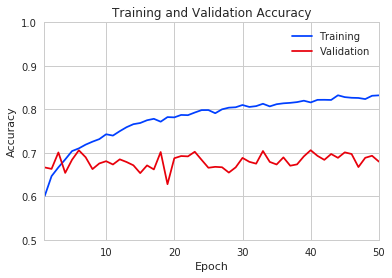

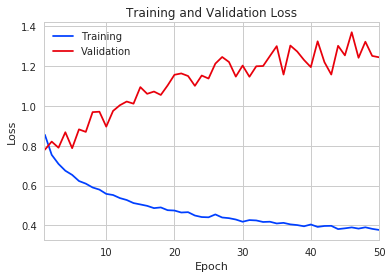

In [12]:
plot_results()

In [ ]:
# fine tuning

In [16]:
# Freeze the layers except the last 4 layers
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3), )

for layer in vgg.layers[:-1]: layer.trainable = False

In [17]:
# Check the trainable status of the individual layers
for layer in vgg.layers: print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa3f92fdd68> False
<keras.layers.convolutional.Conv2D object at 0x7fa3f92fdf60> False
<keras.layers.convolutional.Conv2D object at 0x7fa3f92fde10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa3f8c4eb70> False
<keras.layers.convolutional.Conv2D object at 0x7fa3faac5828> False
<keras.layers.convolutional.Conv2D object at 0x7fa3f8d4b198> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa3f8c8b278> False
<keras.layers.convolutional.Conv2D object at 0x7fa3f8c8bf60> False
<keras.layers.convolutional.Conv2D object at 0x7fa3fa22f278> False
<keras.layers.convolutional.Conv2D object at 0x7fa3fa1c9550> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa3fa1e34a8> False
<keras.layers.convolutional.Conv2D object at 0x7fa3fa1e3f60> False
<keras.layers.convolutional.Conv2D object at 0x7fa3fa19f278> False
<keras.layers.convolutional.Conv2D object at 0x7fa3fa1b6550> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa3fa1564a8>

In [18]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# data augmentation of training dataset    
tr_datagen = ImageDataGenerator(rescale = 1./255, 
                                    rotation_range = 40,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True, 
                                    fill_mode = 'nearest')

# create training dataset
tr_set = tr_datagen.flow_from_directory(dataset + 'split/train', target_size = (128,128),
                                            batch_size = 20, class_mode = 'categorical', seed =50)

# create test datset
te_datagen = ImageDataGenerator(rescale = 1./255)
te_set = te_datagen.flow_from_directory(dataset + 'split/val', target_size = (128,128),
                                            batch_size = 20, class_mode = 'categorical', shuffle='False', seed = 50)

# train the model
model.fit_generator(tr_set, steps_per_epoch = 900, epochs = 5,
                        validation_data = te_set, validation_steps = 220)

Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.
Epoch 1/5
900/900 [==============================] - 103s 115ms/step - loss: 0.8449 - acc: 0.6040 - val_loss: 0.7837 - val_acc: 0.6748
Epoch 2/5
900/900 [==============================] - 103s 114ms/step - loss: 0.7492 - acc: 0.6536 - val_loss: 0.8058 - val_acc: 0.6718
Epoch 3/5
900/900 [==============================] - 103s 114ms/step - loss: 0.7109 - acc: 0.6655 - val_loss: 0.8090 - val_acc: 0.6879
Epoch 4/5
900/900 [==============================] - 102s 113ms/step - loss: 0.6776 - acc: 0.6860 - val_loss: 0.8175 - val_acc: 0.6796
Epoch 5/5
900/900 [==============================] - 102s 114ms/step - loss: 0.6523 - acc: 0.6959 - val_loss: 0.9072 - val_acc: 0.6666
